In [1]:
import pandas as pd
df = pd.read_csv("fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [7]:
# E1
df["customer_id"].nunique()

5191

In [10]:
# E2.1
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [9]:
# E2.2
df["category"].nunique()

8

In [21]:
# E3
df["payment_method"].value_counts().head(1)

Cash    44447
Name: payment_method, dtype: int64

In [24]:
# M1
df["category"].value_counts().head(3)

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: category, dtype: int64

In [25]:
import json
import pandas as pd

with open("dim_customer.json","r") as f:
    data = json.load(f)

df = pd.read_json("dim_customer.json")

df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [46]:
# M2
len(df["age"] > 45)

5191

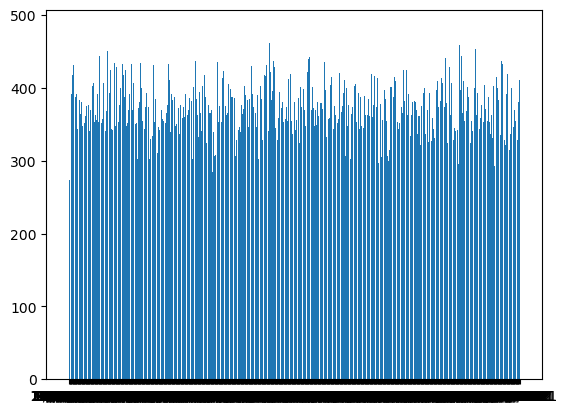

In [1]:
# M3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fct_invoice.csv")

dates = df["invoice_date"].unique()
daily_sales = df.groupby('invoice_date')['quantity'].sum()

plt.bar(dates, daily_sales)
plt.show()

In [14]:
# H1.1
import pandas as pd

df = pd.read_csv("fct_invoice.csv")

df.pivot_table(index = 'category', values = 'quantity', aggfunc = 'sum')

,quantity
category,
Books,14982
Clothing,103558
Cosmetics,45465
Food & Beverage,44277
Shoes,30217
Souvenir,14871
Technology,15021
Toys,30321


In [23]:
# H1.2
sales_df = pd.read_csv("fct_invoice.csv")
customer_df = pd.read_json("dim_customer.json")

customer_df['decade_age'] = customer_df['age'].apply(lambda age: f'{(age // 10) * 10}-{((age // 10) * 10) + 9}')
merged_df = pd.merge(sales_df, customer_df, left_on = 'customer_id', right_on='id')
data = merged_df[['decade_age', 'quantity']]

data.pivot_table(index='decade_age', values='quantity', aggfunc='sum')

,quantity
decade_age,
10.0-19.0,4875
20.0-29.0,27023
30.0-39.0,30665
40.0-49.0,30097
50.0-59.0,26215
60.0-69.0,27964
70.0-79.0,19672
80.0-89.0,11445
nan-nan,120756
